<a href="https://colab.research.google.com/github/jasgunchandnani/NORMID_DigiDex/blob/main/FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/10
469/469 [==============================] - 62s 130ms/step - loss: 0.5787 - accuracy: 0.8082 - val_loss: 0.1697 - val_accuracy: 0.9463
Epoch 2/10
469/469 [==============================] - 62s 132ms/step - loss: 0.2395 - accuracy: 0.9263 - val_loss: 0.0965 - val_accuracy: 0.9699
Epoch 3/10
469/469 [==============================] - 63s 135ms/step - loss: 0.1666 - accuracy: 0.9492 - val_loss: 0.0898 - val_accuracy: 0.9703
Epoch 4/10
469/469 [==============================] - 62s 132ms/step - loss: 0.1343 - accuracy: 0.9581 - val_loss: 0.0804 - val_accuracy: 0.9730
Epoch 5/10
469/469 [==============================] - 62s 132ms/step - loss: 0.1167 - accuracy: 0.9636 - val_loss: 0.0655 - val_accuracy: 0.9786
Epoch 6/10
469/469 [==============================] - 63s 135ms/step - loss: 0.1051 - accuracy: 0.9674 - val_loss: 0.0578 - val_accuracy: 0.9810
Epoch 7/10
469/469 [==============================] - 62s 132ms/step - loss: 0.0952 - accuracy: 0.9704 - val_loss: 0.0575 - val_ac

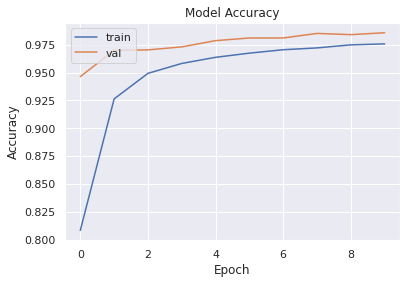

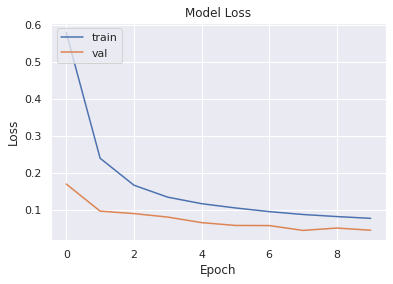

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
from sklearn.metrics import classification_report

# Load the MNIST dataset and split into training and testing sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocess the data by reshaping the images and normalizing the pixel values to be between 0 and 1
x_train = x_train.reshape((60000, 28, 28, 1)) / 255.0
x_test = x_test.reshape((10000, 28, 28, 1)) / 255.0

# Convert the labels to one-hot encoding
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

# Create the CNN model
model = keras.Sequential([
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Define data augmentation techniques
datagen = keras.preprocessing.image.ImageDataGenerator(
    rotation_range=10, # Rotate images randomly by up to 10 degrees
    width_shift_range=0.1, # Shift images horizontally by up to 10% of the width
    height_shift_range=0.1, # Shift images vertically by up to 10% of the height
    horizontal_flip=True, # Flip images horizontally
    vertical_flip=False # Don't flip images vertically
)

# Fit the data augmentation generator on the training data
datagen.fit(x_train)

# Train the model on the augmented data
history = model.fit(datagen.flow(x_train, y_train, batch_size=128), epochs=10, validation_data=(x_test, y_test))

# Evaluate the model on the testing data
test_loss, test_accuracy = model.evaluate(x_test, y_test)
y_pred = np.argmax(model.predict(x_test), axis=-1)
y_true = np.argmax(y_test, axis=-1)

# Print the test accuracy
print('Test accuracy:', test_accuracy)

# Compute and print F1 score, recall, and precision
print(classification_report(y_true, y_pred))

# Plot the training and validation accuracy over time
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# Plot the training and validation loss over time
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


Test accuracy: 0.9706
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.97      0.96      1032
           3       0.95      0.96      0.96      1010
           4       0.97      0.98      0.98       982
           5       0.98      0.96      0.97       892
           6       0.98      0.98      0.98       958
           7       0.97      0.96      0.97      1028
           8       0.96      0.95      0.96       974
           9       0.97      0.95      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



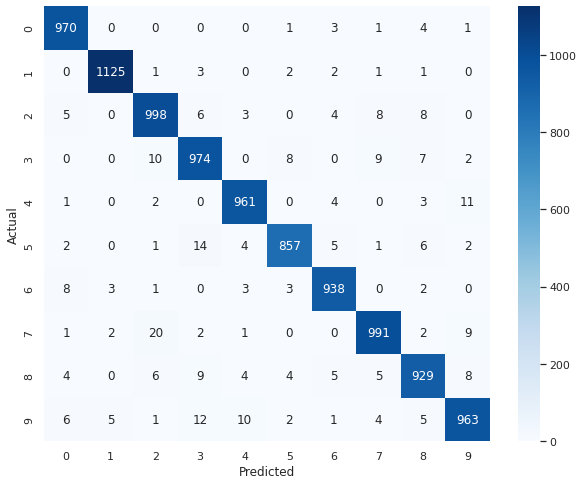

In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from tensorflow.keras.datasets import mnist

# Load the MNIST dataset and split into training and testing sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocess the data by reshaping the images and flattening the pixel values
x_train = x_train.reshape((60000, 784))
x_test = x_test.reshape((10000, 784))

# Create the random forest classifier with 100 trees
clf = RandomForestClassifier(n_estimators=100)

# Fit the classifier on the training data
clf.fit(x_train, y_train)

# Evaluate the classifier on the testing data
y_pred = clf.predict(x_test)

# Print the test accuracy
test_accuracy = np.mean(y_pred == y_test)
print('Test accuracy:', test_accuracy)

# Compute and print F1 score, recall, and precision
print(classification_report(y_test, y_pred))

# Plot a confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Accuracy: 0.9792
Precision: 0.9791973966593345
Recall: 0.9790919842945065
F1 score: 0.9791298259748042
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.97      0.98      1032
           3       0.97      0.99      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.99      0.98      0.98       892
           6       0.99      0.99      0.99       958
           7       0.98      0.97      0.97      1028
           8       0.97      0.98      0.97       974
           9       0.97      0.96      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



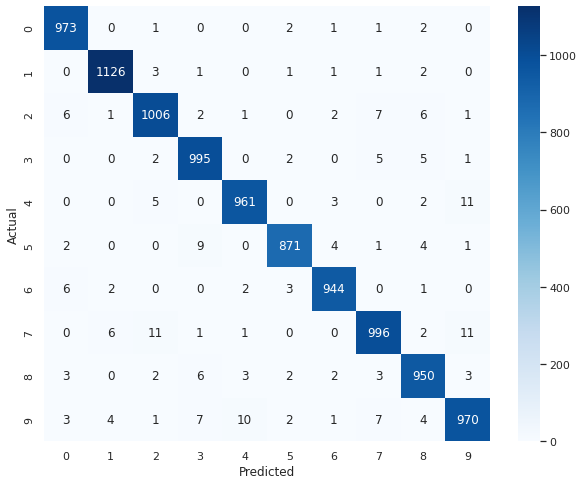

In [ ]:
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.datasets import mnist

# Load the MNIST dataset and split into training and testing sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocess the data by reshaping the images and flattening the pixel values
x_train = x_train.reshape((60000, 784))
x_test = x_test.reshape((10000, 784))

# Create the SVM classifier with a radial basis function kernel and C=1
clf = SVC(kernel='rbf', C=1)

# Fit the classifier on the training data
clf.fit(x_train, y_train)

# Evaluate the classifier on the testing data
y_pred = clf.predict(x_test)

# Compute and print accuracy, precision, recall, and F1 score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)

# Compute and print classification report
print(classification_report(y_test, y_pred))

# Plot a confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Accuracy: 0.8781
Precision: 0.878436864994797
Recall: 0.8781
F1 score: 0.8781796735463048


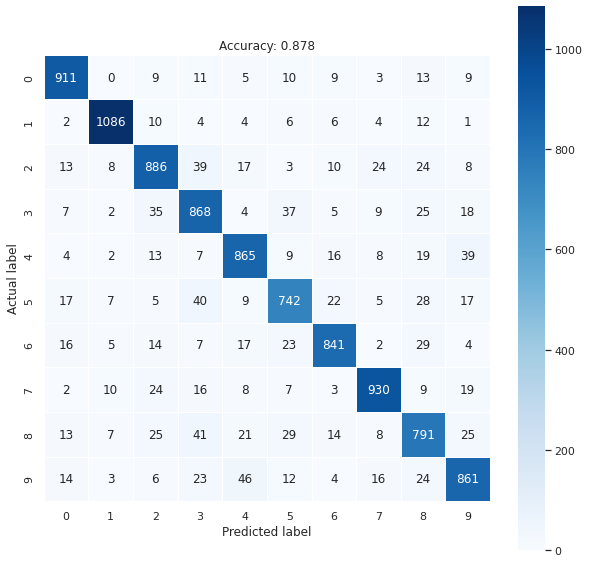

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the MNIST dataset
mnist = tf.keras.datasets.mnist

# Split the dataset into training and testing sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Flatten the input data
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)

# Build the decision tree model
model = DecisionTreeClassifier()

# Train the model
model.fit(x_train, y_train)

# Make predictions on the test set
y_pred = model.predict(x_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square=True, cmap='Blues')
plt.title('Accuracy: {0:.3f}'.format(accuracy))
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()


Accuracy: 0.9688
Precision: [0.96340257 0.95450716 0.98216056 0.96442688 0.9762151  0.96528555
 0.98130841 0.96108949 0.98809524 0.95626243]
Recall: [0.99387755 0.99823789 0.96027132 0.96633663 0.96130346 0.96636771
 0.98643006 0.96108949 0.93737166 0.95341923]
F1 Score: [0.97840281 0.97588286 0.9710926  0.96538081 0.9687019  0.96582633
 0.98386257 0.96108949 0.96206533 0.95483871]


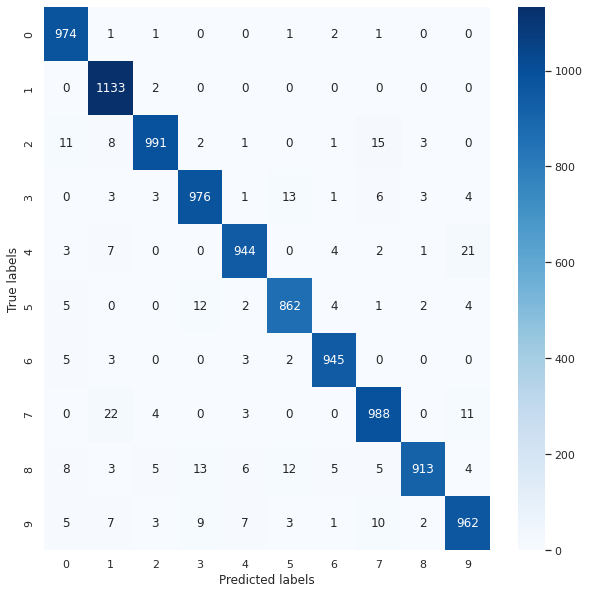

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from tensorflow.keras.datasets import mnist

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Flatten the images to 1D array
x_train = x_train.reshape((-1, 28*28))
x_test = x_test.reshape((-1, 28*28))

# Normalize the input data
x_train, x_test = x_train / 255.0, x_test / 255.0

# Build the KNN model
k = 5
knn = KNeighborsClassifier(n_neighbors=k)

# Fit the model
knn.fit(x_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average=None)
recall = recall_score(y_test, y_pred, average=None)
f1 = f1_score(y_test, y_pred, average=None)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()


Epoch 1/10
375/375 [==============================] - 6s 14ms/step - loss: 0.3663 - accuracy: 0.8891 - val_loss: 0.1365 - val_accuracy: 0.9613
Epoch 2/10
375/375 [==============================] - 6s 17ms/step - loss: 0.1373 - accuracy: 0.9586 - val_loss: 0.1051 - val_accuracy: 0.9694
Epoch 3/10
375/375 [==============================] - 5s 14ms/step - loss: 0.0966 - accuracy: 0.9712 - val_loss: 0.0948 - val_accuracy: 0.9718
Epoch 4/10
375/375 [==============================] - 6s 16ms/step - loss: 0.0778 - accuracy: 0.9772 - val_loss: 0.0919 - val_accuracy: 0.9745
Epoch 5/10
375/375 [==============================] - 6s 15ms/step - loss: 0.0657 - accuracy: 0.9797 - val_loss: 0.0879 - val_accuracy: 0.9762
Epoch 6/10
375/375 [==============================] - 5s 14ms/step - loss: 0.0559 - accuracy: 0.9832 - val_loss: 0.0848 - val_accuracy: 0.9765
Epoch 7/10
375/375 [==============================] - 6s 17ms/step - loss: 0.0480 - accuracy: 0.9856 - val_loss: 0.0911 - val_accuracy: 0.9771

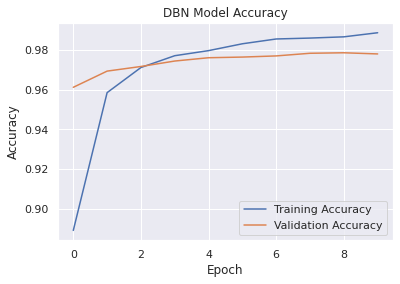

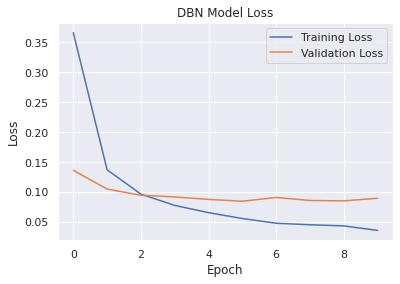

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Load the MNIST dataset and split into training and testing sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocess the data by reshaping the images and normalizing the pixel values to be between 0 and 1
x_train = x_train.reshape((60000, 28*28)) / 255.0
x_test = x_test.reshape((10000, 28*28)) / 255.0

# One-hot encode the labels
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

# Create the DBN model
model = keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=(28*28,)),
    layers.Dropout(0.2),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model on the training data
history = model.fit(x_train, y_train, batch_size=128, epochs=10, validation_split=0.2)

# Evaluate the model on the testing data
test_loss, test_accuracy = model.evaluate(x_test, y_test)
y_pred = np.argmax(model.predict(x_test), axis=-1)
y_true = np.argmax(y_test, axis=-1)

# Print the test accuracy
print('Test accuracy:', test_accuracy)

# Compute and print F1 score, recall, and precision
print(classification_report(y_true, y_pred))

# Plot the training and validation accuracy over time
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('DBN Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot the training and validation loss over time
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('DBN Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


Epoch 1/10
375/375 [==============================] - 6s 13ms/step - loss: 0.2971 - accuracy: 0.9116 - val_loss: 0.1220 - val_accuracy: 0.9626
Epoch 2/10
375/375 [==============================] - 6s 15ms/step - loss: 0.1203 - accuracy: 0.9645 - val_loss: 0.0957 - val_accuracy: 0.9713
Epoch 3/10
375/375 [==============================] - 5s 14ms/step - loss: 0.0844 - accuracy: 0.9743 - val_loss: 0.0806 - val_accuracy: 0.9751
Epoch 4/10
375/375 [==============================] - 5s 13ms/step - loss: 0.0646 - accuracy: 0.9794 - val_loss: 0.0814 - val_accuracy: 0.9763
Epoch 5/10
375/375 [==============================] - 6s 16ms/step - loss: 0.0513 - accuracy: 0.9833 - val_loss: 0.0776 - val_accuracy: 0.9778
Epoch 6/10
375/375 [==============================] - 5s 13ms/step - loss: 0.0421 - accuracy: 0.9861 - val_loss: 0.0757 - val_accuracy: 0.9784
Epoch 7/10
375/375 [==============================] - 6s 16ms/step - loss: 0.0383 - accuracy: 0.9879 - val_loss: 0.0781 - val_accuracy: 0.9794

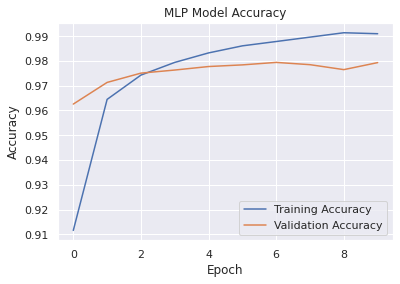

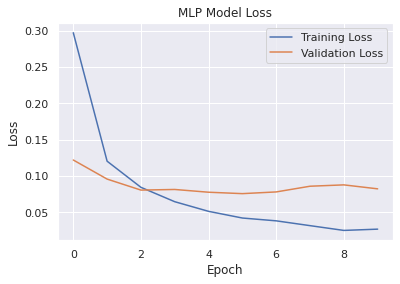

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Load the MNIST dataset and split into training and testing sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocess the data by reshaping the images and normalizing the pixel values to be between 0 and 1
x_train = x_train.reshape((60000, 28*28)) / 255.0
x_test = x_test.reshape((10000, 28*28)) / 255.0

# One-hot encode the labels
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

# Create the MLP model
model = keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=(28*28,)),
    layers.Dropout(0.2),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model on the training data
history = model.fit(x_train, y_train, batch_size=128, epochs=10, validation_split=0.2)

# Evaluate the model on the testing data
test_loss, test_accuracy = model.evaluate(x_test, y_test)
y_pred = np.argmax(model.predict(x_test), axis=-1)
y_true = np.argmax(y_test, axis=-1)

# Print the test accuracy
print('Test accuracy:', test_accuracy)

# Compute and print F1 score, recall, and precision
print(classification_report(y_true, y_pred))

# Plot the training and validation accuracy over time
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('MLP Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot the training and validation loss over time
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('MLP Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
